# Exploratory Data Analysis & Data Preprocessing

*In this IPython notebook, I'll be detailing all the steps I took to properly understand the information that the data I've collected the paper, "Cross-platform dataset of multiplex fluorescent cellular object image annotations" has to offer and figure out the steps that need to be taken for preprocessing the data*

##### Imports

In [16]:
import os
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread, imsave, imshow
import shutil
import cv2
import random

##### Helper Functions

In [2]:
def get_files_wrt_extension(path, file_extension):
    """Get all files with a given extension in the given directory"""
    file_paths = []
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith(file_extension):
                file_paths.append(os.path.join(root, file))
    return file_paths

##### Loading the Data

In [31]:
IMG_DIR = r'D:\SimBioSys - main\data\organized_data\image'
MASK_DIR =r'D:\SimBioSys - main\data\organized_data\mask'

##### Image Data

In [32]:
image_paths = get_files_wrt_extension(IMG_DIR, ".tif")

In [33]:
image_array_list = [np.array(imread(img)) for img in image_paths]

In [34]:
#Number of Images
print(len(image_array_list))

161


In [35]:
#Dimensions
img_dims = [img.shape for img in image_array_list]

In [36]:
#Unique dimensions for images in the dataset
print(np.unique(img_dims))

[(5, 800, 800) (7, 400, 400, 4) (7, 800, 800) (8, 400, 400)
 (8, 400, 400, 4) (8, 2008, 2684)]


c:\Users\gopik\anaconda3\envs\programming\lib\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [37]:
#Number of images for each set of dimensions
dim, count = np.unique(img_dims, return_counts=True)
img_counter = {d : c for d, c in zip(dim, count)}
print(img_counter)

{(5, 800, 800): 15, (7, 400, 400, 4): 5, (7, 800, 800): 3, (8, 400, 400): 132, (8, 400, 400, 4): 5, (8, 2008, 2684): 1}


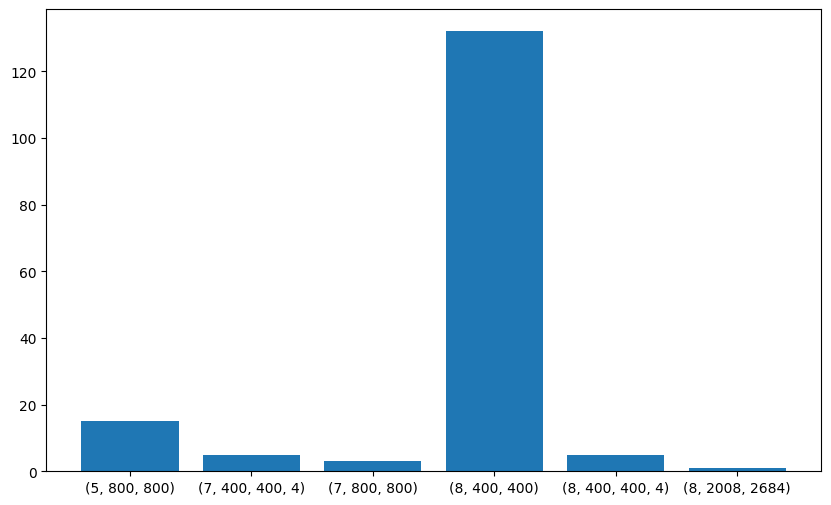

In [38]:
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(dim)), count)
plt.xticks(range(len(dim)), dim)
plt.show()

*From the above results, we can ascertain that the input images in the dataset have differring dimensions and we would need to take steps to bring all the images to a specific dimensions*

**Task 1: Resize Input Images**

*Since a huge chunk of the dataset is of the dimension (8, 400, 400), let's visualize the remaining to explore possible avenues to bring all the images to a common dimension*

In [39]:
required_image_paths = []
required_image_dims = []
required_dims = [(5, 800, 800), (7, 400, 400, 4), (7, 800, 800), (8, 400, 400, 4), (8, 2008, 2684)]
for img in image_paths:
    img_array = np.array(imread(img))
    if img_array.shape in required_dims:
        required_image_paths.append(img)
        required_image_dims.append(img_array.shape)

In [40]:
outlier_images_df = pd.DataFrame(
    {'path': required_image_paths,
     'dims': required_image_dims,
    })
outlier_images_df = outlier_images_df.sort_values(by=['dims']).copy()
outlier_images_df

,path,dims
14,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
23,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
22,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
21,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
20,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
19,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
18,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
17,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
16,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"
15,D:\SimBioSys - main\data\organized_data\image\...,"(5, 800, 800)"


In [41]:
mask_paths = get_files_wrt_extension(MASK_DIR, ".png")
for i in range(29):
    test_case = outlier_images_df.iloc[i]
    test_sample = os.path.basename(test_case.path).split('-')[0]
    for mask in mask_paths:
        if test_sample in mask:
            test_mask = mask
            break
    print(f"Image Dims: {test_case.dims}, Mask Dims: {imread(test_mask).shape}")

Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (5, 800, 800), Mask Dims: (800, 800)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image Dims: (7, 400, 400, 4), Mask Dims: (400, 400)
Image

In [45]:
sorted(outlier_images_df.path.values)

['D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(1700,2600)-crop_tiff.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(2400,800)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(3200,800)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(4500,2000)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_ln(5900,2600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4200,5200)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4900,3600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(4900,5150)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(5300,3600)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\codex_tnsl(5600,4700)-crop_tif.tif',
 'D:\\SimBioSys - main\\data\\organized_data\\image\\p03-10012(56707.13038)650,600-crop_tif.tif',
 'D:\\SimBioS

*On observing that paths, we realize that the problematic data are those from the CODEX and Zeiss platforms. Ideally, if we remove them from the group, we should have 133 samples of the same image and mask sizes. Let's confirm that theory*

In [46]:
vectra_path = r"D:\SimBioSys - main\data\rough_data\Vectra"

In [47]:
vectra_image_paths = get_files_wrt_extension(vectra_path, ".tif")
vectra_mask_paths = get_files_wrt_extension(vectra_path, ".png")

In [49]:
print(f"Number of Images: {len(vectra_image_paths)}")
print(f"Number of Masks: {len(vectra_mask_paths)}")

Number of Images: 133
Number of Masks: 133


In [50]:
vectra_image_dims = []
vectra_mask_dims = []
for img_path, mask_path in zip(vectra_image_paths, vectra_mask_paths):
    vectra_image_dims.append(imread(img_path).shape)
    vectra_mask_dims.append(imread(mask_path).shape)

In [51]:
set(vectra_image_dims)

{(8, 400, 400), (8, 2008, 2684)}

In [52]:
set(vectra_mask_dims)

{(400, 400)}

*Now we see that in Vectra, we have 132 perfect samples and one outlier. We'll the find the path to the image and mask and verify if the (8, 2008, 2684) dimensions is just an error in the dataset and if it  can be cropped down to (8, 400, 400). We'll find the path here and do the verification using ImageJ and it's plugins.*

In [53]:
outlier_index = vectra_image_dims.index((8, 2008, 2684))
print(f"Outlier Path: {vectra_image_paths[outlier_index]}")

Outlier Path: D:\SimBioSys - main\data\rough_data\Vectra\p03-10012(56707.13038)650,600-crop_tif.tif


*On checking the samples, it was observed that original image can be cropped to the required dimension because the mask is only for a specific crop of that image. We'll seperate it from the original dataset by renaming and crop using ImageJ. Once that's done, we'll add it back to our main data directory as follows:*

In [57]:
outlier_path = vectra_image_paths[outlier_index]
outlier_dir = os.path.dirname(outlier_path)
renamed_path = os.path.join(outlier_dir, "to_be_cropped.tiff")
os.rename(outlier_path, renamed_path)

In [75]:
shutil.copy2(outlier_path, r"D:\SimBioSys - main\data\organized_data\image\p03-10012(56707.13038)650,600-crop_tif.tif")

'D:\\SimBioSys - main\\data\\organized_data\\image\\p03-10012(56707.13038)650,600-crop_tif.tif'

*After cropping, I've verified with ImageJ that it fit the standards we kept. We'll re-run the earlier script to check if the dataset is proper*

In [81]:
image_paths = get_files_wrt_extension(IMG_DIR, ".tif")

In [82]:
image_array_list = [np.array(imread(img)) for img in image_paths]

In [83]:
#Number of Images
print(len(image_array_list))

161


In [84]:
#Dimensions
img_dims = [img.shape for img in image_array_list]

In [85]:
#Unique dimensions for images in the dataset
print(np.unique(img_dims))

[(5, 800, 800) (7, 400, 400, 4) (7, 800, 800) (8, 400, 400)
 (8, 400, 400, 4)]


c:\Users\gopik\anaconda3\envs\programming\lib\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [86]:
#Number of images for each set of dimensions
dim, count = np.unique(img_dims, return_counts=True)
img_counter = {d : c for d, c in zip(dim, count)}
print(img_counter)

{(5, 800, 800): 15, (7, 400, 400, 4): 5, (7, 800, 800): 3, (8, 400, 400): 133, (8, 400, 400, 4): 5}


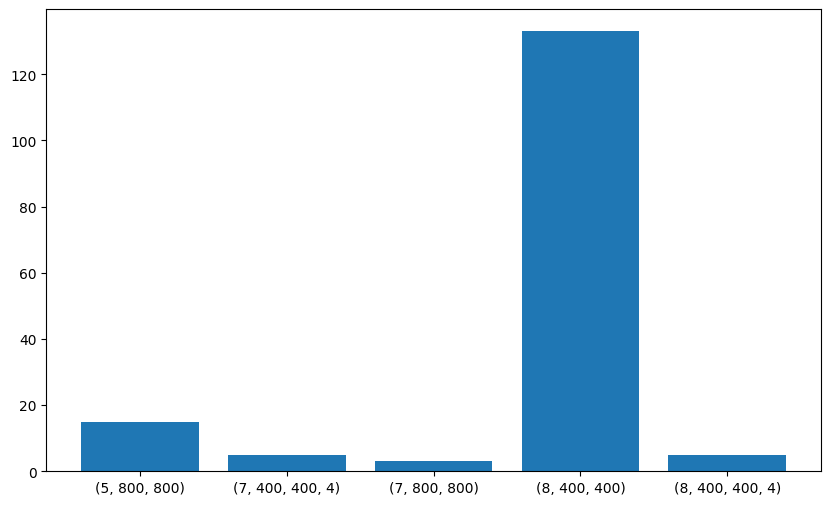

In [87]:
plt.figure(figsize=(10, 6)) 
plt.bar(range(len(dim)), count)
plt.xticks(range(len(dim)), dim)
plt.show()

*At this stage, we have a dataset which is heavily skewed to one set of dimensions. Therefore we have 3 possible options going forward.*
1. Drop the outlier data and use the remaining data to create the model and create a Proof-Of-Concept.
2. Invest time into bringing outlier data into the same dimensions as the main dataset.
3. Develop different models to work on different data dimensions.

The third option is not viable at this point because of the lack of data required sufficiently train the model for those dimension. The second option is a viable, however it would require extensive research into figuring out what would the correct method to resize the model without having extensive loss in information in the process. Therefore, we'll proceed with the first step and establish a working model provide and proof of concept.

Since we're able to create a proof of concept for Image Segemntation task where given an Image, the model is able to make a mask image of the cell annotation, we'll proceed with the next step -> Image Classification where given the mask image a model is able to ascertain what type of tumor the cells belong to.

##### Dataset Exploration for Image Classification

*On observing the data, we see that the only annotated data we have belongs to the data from the Zeiss platform which we saw in the earlier section. We disregarded this data for the earlier model because the original images of the cell structure didn't fit the dimensional requirements of our model. However, since we're considering only the mask images and class labels for this model, we'll have a much easier time preparing the dataset.*

In [3]:
classification_data_dir = "../data/rough_data/Zeiss/"

In [4]:
#Dict : Class Labels -> File Names
label_filename_dict = {
    'CTCL' : 'ZP-1000',
    'PDAC' : 'PDAC',
    'Basal Cell' : 'ZP-9999',
    'Spleen' : 'Spleen'
}

In [5]:
mask_paths = get_files_wrt_extension(classification_data_dir, '.png')
mask_paths

['../data/rough_data/Zeiss/PDAC(35000,27720)6800,3050-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/PDAC(35000,27720)8500,11800-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/Spleen(0,0)1075,500-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/Spleen(0,0)1700,1250-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/Spleen(0,0)2450,600-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/Spleen(0,0)4200,1000-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/Spleen(0,0)800,2450-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(13500,16632)11911,6470-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(13500,16632)12315,7165-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(13500,16632)12611,7970-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(13500,16632)7611,2870-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(13500,16632)8411,3195-Crop_Cell_Mask_Png.png',
 '../data/rough_data/Zeiss/ZP-10001(6750,2000)3512,2569-Crop_

In [6]:
mask_label = []
for mask_path in mask_paths:
    mask_name = os.path.basename(mask_path)
    for label, filename in label_filename_dict.items():
        if mask_name.startswith(filename):
            mask_label.append(label)
            break
mask_label

['PDAC',
 'PDAC',
 'Spleen',
 'Spleen',
 'Spleen',
 'Spleen',
 'Spleen',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'CTCL',
 'Basal Cell',
 'Basal Cell']

In [7]:
classification_df = pd.DataFrame(
    {'path': mask_paths,
     'labels': mask_label
    }
)
classification_df

,path,labels
0,"../data/rough_data/Zeiss/PDAC(35000,27720)6800...",PDAC
1,"../data/rough_data/Zeiss/PDAC(35000,27720)8500...",PDAC
2,"../data/rough_data/Zeiss/Spleen(0,0)1075,500-C...",Spleen
3,"../data/rough_data/Zeiss/Spleen(0,0)1700,1250-...",Spleen
4,"../data/rough_data/Zeiss/Spleen(0,0)2450,600-C...",Spleen
5,"../data/rough_data/Zeiss/Spleen(0,0)4200,1000-...",Spleen
6,"../data/rough_data/Zeiss/Spleen(0,0)800,2450-C...",Spleen
7,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL
8,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL
9,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL


*From the above dataframe, it's obvious that the dataset is imbalanced. Let's look at the actual number:*

In [9]:
classification_df.groupby(['labels']).count()

,path
labels,
Basal Cell,2
CTCL,9
PDAC,2
Spleen,5


*From the earlier exploratory analysis we carried out as part of the Image Segmentation task, we know that some of the mask images are of dimensions (800, 800) instead of the required dimensions of (400, 400). Therefore, it may be possible to create 4 samples of same class from one sample by cropping each of those bigger samples into 4. Let's explore the dimensions of each of the above samples:*

In [10]:
mask_dims = []
mask_possible_samples = []
for path in classification_df['path']:
    img_array_shape = imread(path).shape
    mask_dims.append(img_array_shape)
    if img_array_shape[0] == 400:
        mask_possible_samples.append(1)
    else:
        mask_possible_samples.append(4)

In [11]:
classification_v2_df = pd.DataFrame(
    {'Path' : mask_paths,
     'Labels' : mask_label,
     'Dimensions' : mask_dims,
     'Number Of Samples' : mask_possible_samples
    }
)
classification_v2_df

,Path,Labels,Dimensions,Number Of Samples
0,"../data/rough_data/Zeiss/PDAC(35000,27720)6800...",PDAC,"(800, 800)",4
1,"../data/rough_data/Zeiss/PDAC(35000,27720)8500...",PDAC,"(800, 800)",4
2,"../data/rough_data/Zeiss/Spleen(0,0)1075,500-C...",Spleen,"(800, 800)",4
3,"../data/rough_data/Zeiss/Spleen(0,0)1700,1250-...",Spleen,"(800, 800)",4
4,"../data/rough_data/Zeiss/Spleen(0,0)2450,600-C...",Spleen,"(800, 800)",4
5,"../data/rough_data/Zeiss/Spleen(0,0)4200,1000-...",Spleen,"(800, 800)",4
6,"../data/rough_data/Zeiss/Spleen(0,0)800,2450-C...",Spleen,"(800, 800)",4
7,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL,"(800, 800)",4
8,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL,"(800, 800)",4
9,"../data/rough_data/Zeiss/ZP-10001(13500,16632)...",CTCL,"(800, 800)",4


In [14]:
classification_v2_df[['Labels', 'Number Of Samples']].groupby(['Labels']).sum()

,Number Of Samples
Labels,
Basal Cell,8
CTCL,36
PDAC,8
Spleen,20


I have 4 tranformations in mind which we can be applied to bring the dataset size to 200 i.e., 40 for each class. They're as follows:
1. Horizontal Flip
2. Vertical Flip
3. Affine Transformation
4. Rotation
5. Perspective Transformation

*Now, we'll define helper functions for each of the transformations:*

In [43]:
def horizontal_flip(image):
    return np.flip(image, axis=1)

def vertical_flip(image):
    return np.flip(image, axis=0)

def affine_tranform(image):
    delta_x = random.randint(50, 100) if random.random() < 0.5 else random.randint(-100, -50)
    delta_y = random.randint(50, 100) if random.random() < 0.5 else random.randint(-100, -50)
    translation_matrix = np.float32([[1, 0, delta_x], [0, 1, delta_y]])
    translated_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
    return translated_image

def rotate_image(image):
    rotation_angle = random.randint(45, 135)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def perspective_transform(image):
    source_points = np.float32([[0, 0], [image.shape[1], 0], [0, image.shape[0]], [image.shape[1], image.shape[0]]])
    destination_points = np.float32([[random.randint(50, 350), random.randint(50, 350)], [image.shape[1] - random.randint(50, 100), random.randint(50, 350)], [0, image.shape[0]], [image.shape[1], image.shape[0]]])
    perspective_matrix = cv2.getPerspectiveTransform(source_points, destination_points)
    perspective_image = cv2.warpPerspective(image, perspective_matrix, (image.shape[1], image.shape[0]))
    return perspective_image

*Now, let's test out over transform helper functions:*

In [44]:
test_image_path = classification_v2_df['Path'].iloc[0]
test_image = imread(test_image_path)

In [45]:
test_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0, 255, 255, ...,   0, 255, 255],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [46]:
test_image.shape

(800, 800)

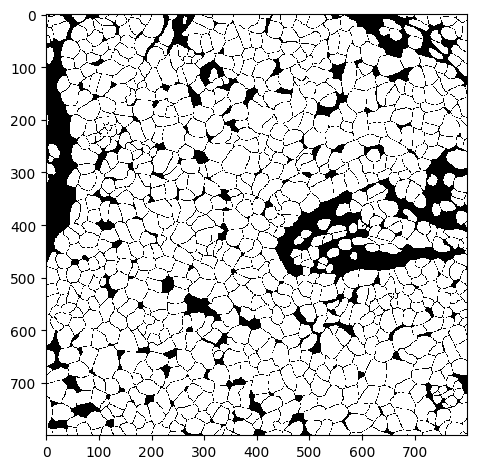

In [47]:
#Original
imshow(test_image)

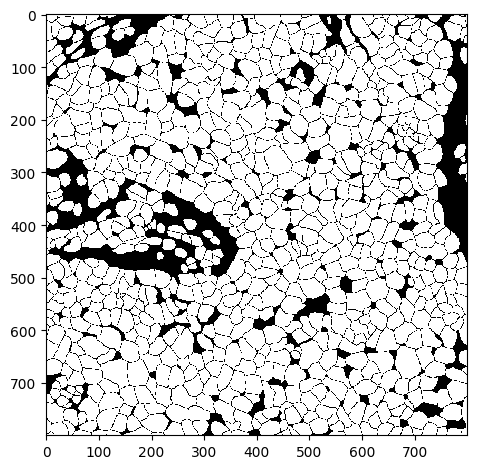

In [48]:
#Horizontal Flip
imshow(horizontal_flip(test_image))

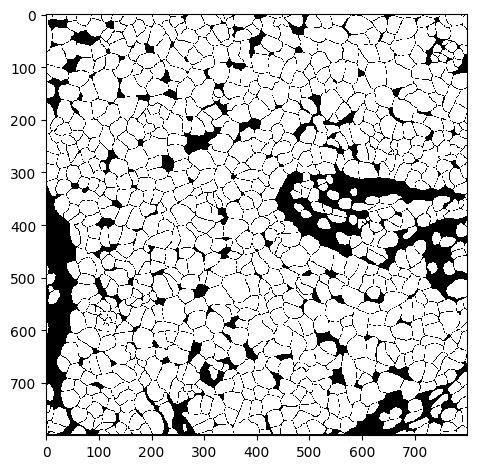

In [49]:
#Vertical Flip
imshow(vertical_flip(test_image))

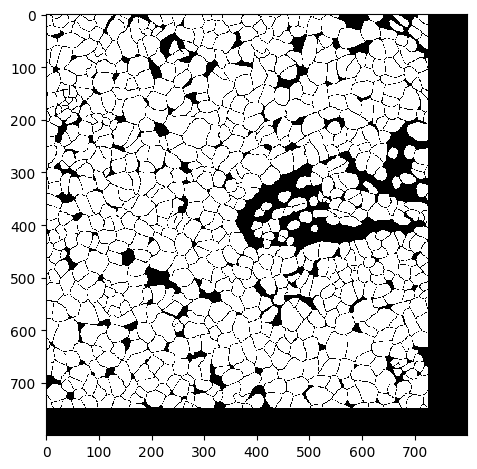

In [50]:
#Affine Transformation
imshow(affine_tranform(test_image))

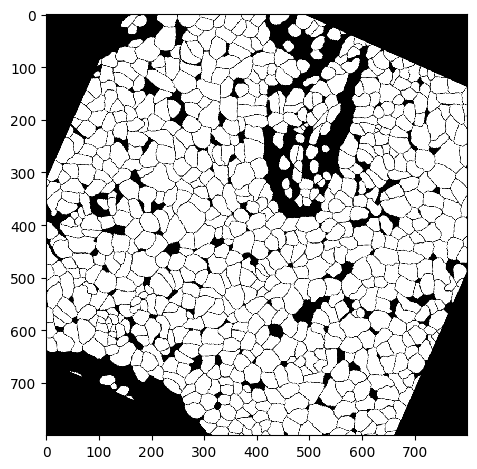

In [51]:
#Rotate
imshow(rotate_image(test_image))

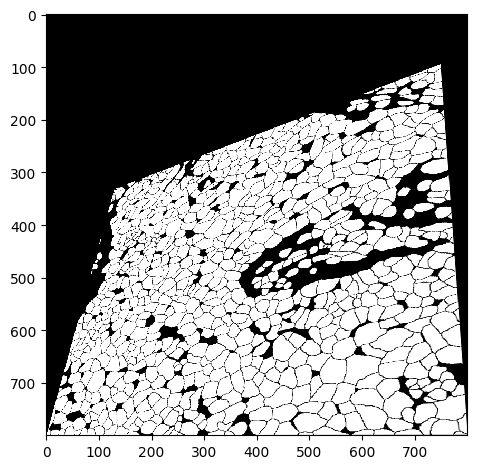

In [52]:
#Perspective Transform
imshow(perspective_transform(test_image))